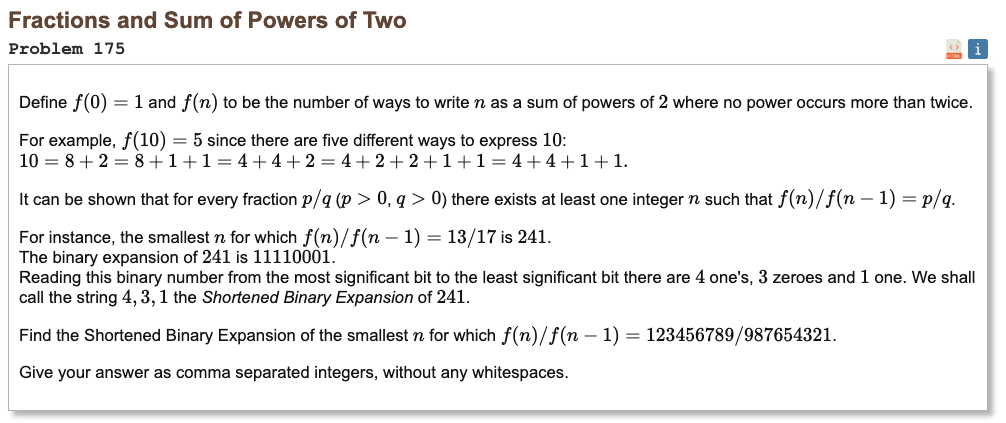

## Initial approach

* f(n) counts hyperbinary representations, equal to Stern sequence a(n plus 1), so f(n)/f(n minus 1) equals a(n plus 1)/a(n)
* ratios a(n)/a(n plus 1) are exactly the Calkin Wilf sequence, whose continued fraction equals the run lengths of the binary index read from the least significant bit
* for our target p over q, use the reciprocal q over p to match a(n)/a(n plus 1)
* take the simple continued fraction of q over p, if it has even length replace the last term t by t minus 1 then 1 to make the length odd
* those coefficients are the least significant bit run lengths, reversing them gives the shortened binary expansion
* reduce 123456789 over 987654321 to 13717421 over 109739369
* the continued fraction of 109739369 over 13717421 is [8, 13717421], make it odd to get [8, 13717420, 1], reverse to get 1, 13717420, 8
* answer is the sbe as comma separated integers

In [1]:
from math import gcd

def contfrac(p, q):
    a = []
    while q:
        a0 = p // q
        a.append(a0)
        p, q = q, p - a0 * q
    return a

def sbe_for_fraction(p, q):
    g = gcd(p, q)
    p //= g
    q //= g
    cf = contfrac(q, p)
    if len(cf) % 2 == 0:
        cf = cf[:-1] + [cf[-1] - 1, 1]
    sbe = list(reversed(cf))
    return sbe

In [2]:
%%time
sbe = sbe_for_fraction(123456789, 987654321)
result = ",".join(str(x) for x in sbe)
print("Result:", result)

Result: 1,13717420,8
CPU times: user 93 μs, sys: 11 μs, total: 104 μs
Wall time: 95.8 μs
